# 1. Load in the data

In [1]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = loadarff("Training Dataset.arff")
df = pd.DataFrame(raw_data[0])
for c in df.columns:
    df[c] = df[c].apply(lambda x: x.decode('ascii')) # remove weird binary values, leave as string for now
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


# 2. What kind of data exists; descriptive statistics

#### Feature encoding:
- 1 - legitimate
- 0 - suspicious
- -1 - phishing

All of our feature columns contain ordinal data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

In [4]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


# 3. Missing values and outlier data

There are no missing values.

We are dealing with ordinal data. Ordinal data doesn't have a clear outlier definition. However, we can consider unbalanced categories(features) as the possible outlier data. For example, we can see that the feature "Shortining_Service" has 9611 instances with a value of $1$ (legitimate), and consequently, 1444 instances with a value of $-1$ (phishing).

[This article](https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/#:~:text=Outliers%20in%20the%20categorical%20data%20can%20also%20be%20said%20to,oversampling%20and%20SMOTE%20analysis.) describes outliers in categorical (ordinal) data.

Luckily, our result column is quite balanced (6157/4898).

In [5]:
# All features with possible unbalanced classes
unbalanced = list()
descriptive_stats = df.describe()
for col in descriptive_stats:
    ales = descriptive_stats[col]["count"]
    count = descriptive_stats[col]["freq"]
    if count/ales > 0.8: # threshold is 80%
        unbalanced.append(col)
        
descriptive_stats[unbalanced]

,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,Favicon,port,HTTPS_token,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,Google_Index,Statistical_report
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,-1,1,1,1,-1,1,1,1,1,1,0,1,1,1,1,1,1
freq,8960,9611,9400,9626,9590,9002,9553,9259,9041,9426,9776,9740,10579,8918,10043,9516,9505


# 4. Data visualization

In [6]:
df_by_class = df.agg(['count', lambda x: sum(x=="1"), lambda x: sum(x=='0'), lambda x: sum(x=='-1')])
df_by_class = df_by_class.reset_index(drop=True)
df_by_class = df_by_class.rename(index={0:"total count", 1:"legitimate count", 2:"suspicious count", 3:"phishing count"})
df_by_classT = df_by_class.T
df_by_classT_perc = df_by_classT.apply(lambda x: x/11055)
df_by_classT_perc = df_by_classT_perc.reset_index()
df_by_classT_perc = df_by_classT_perc.sort_values("phishing count", ascending=False)
df_by_classT_perc["sus plus phish"] = df_by_classT_perc["suspicious count"] + df_by_classT_perc["phishing count"]
df_by_classT_perc.head()

,index,total count,legitimate count,suspicious count,phishing count,sus plus phish
5,Prefix_Suffix,1.0,0.132519,0.000000,0.867481,0.867481
1,URL_Length,1.0,0.177295,0.012212,0.810493,0.822705
15,SFH,1.0,0.167707,0.068838,0.763455,0.832293
26,Page_Rank,1.0,0.258164,0.000000,0.741836,0.741836
8,Domain_registeration_length,1.0,0.331615,0.000000,0.668385,0.668385


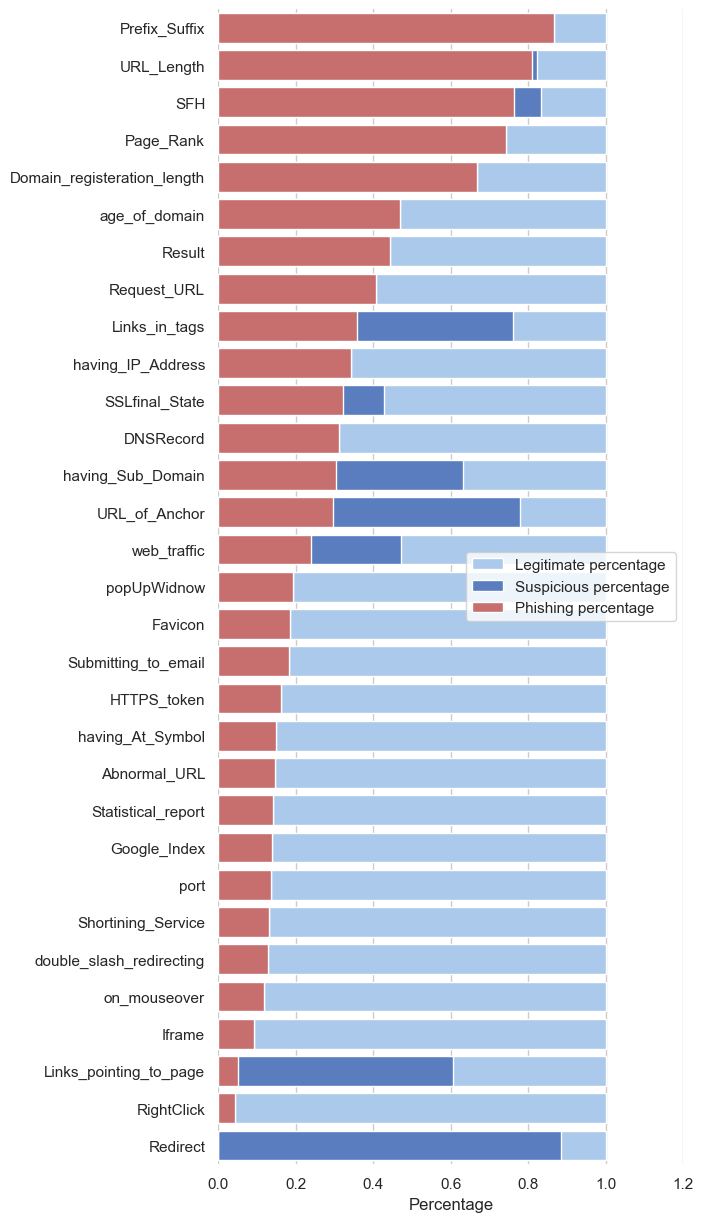

In [7]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
# Plot all, label legitimate (legitimate is the furthest down)
sns.barplot(x="total count", y="index", data=df_by_classT_perc,
            label="Legitimate percentage", color='b')

sns.set_color_codes("muted")
# Plot suspicious + phishing, suspicious is the middle layer
sns.barplot(x="sus plus phish", y="index", data=df_by_classT_perc,
            label="Suspicious percentage", color='b')

# Plot just suspicious
sns.barplot(x="phishing count", y="index", data=df_by_classT_perc,
            label="Phishing percentage", color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="right", frameon=True)
ax.set(xlim=(0, 1.2), ylabel="",
       xlabel="Percentage")
sns.despine(left=True, bottom=True)

# 5. Correlation matrix

The correlation matrix gives an overview of feature covariances. We can see which features most closely correlate with the desired Result column. Furthermore, we can see which feature are highly correlated together, and discard one of those features - reduce the dimensionality of the data.

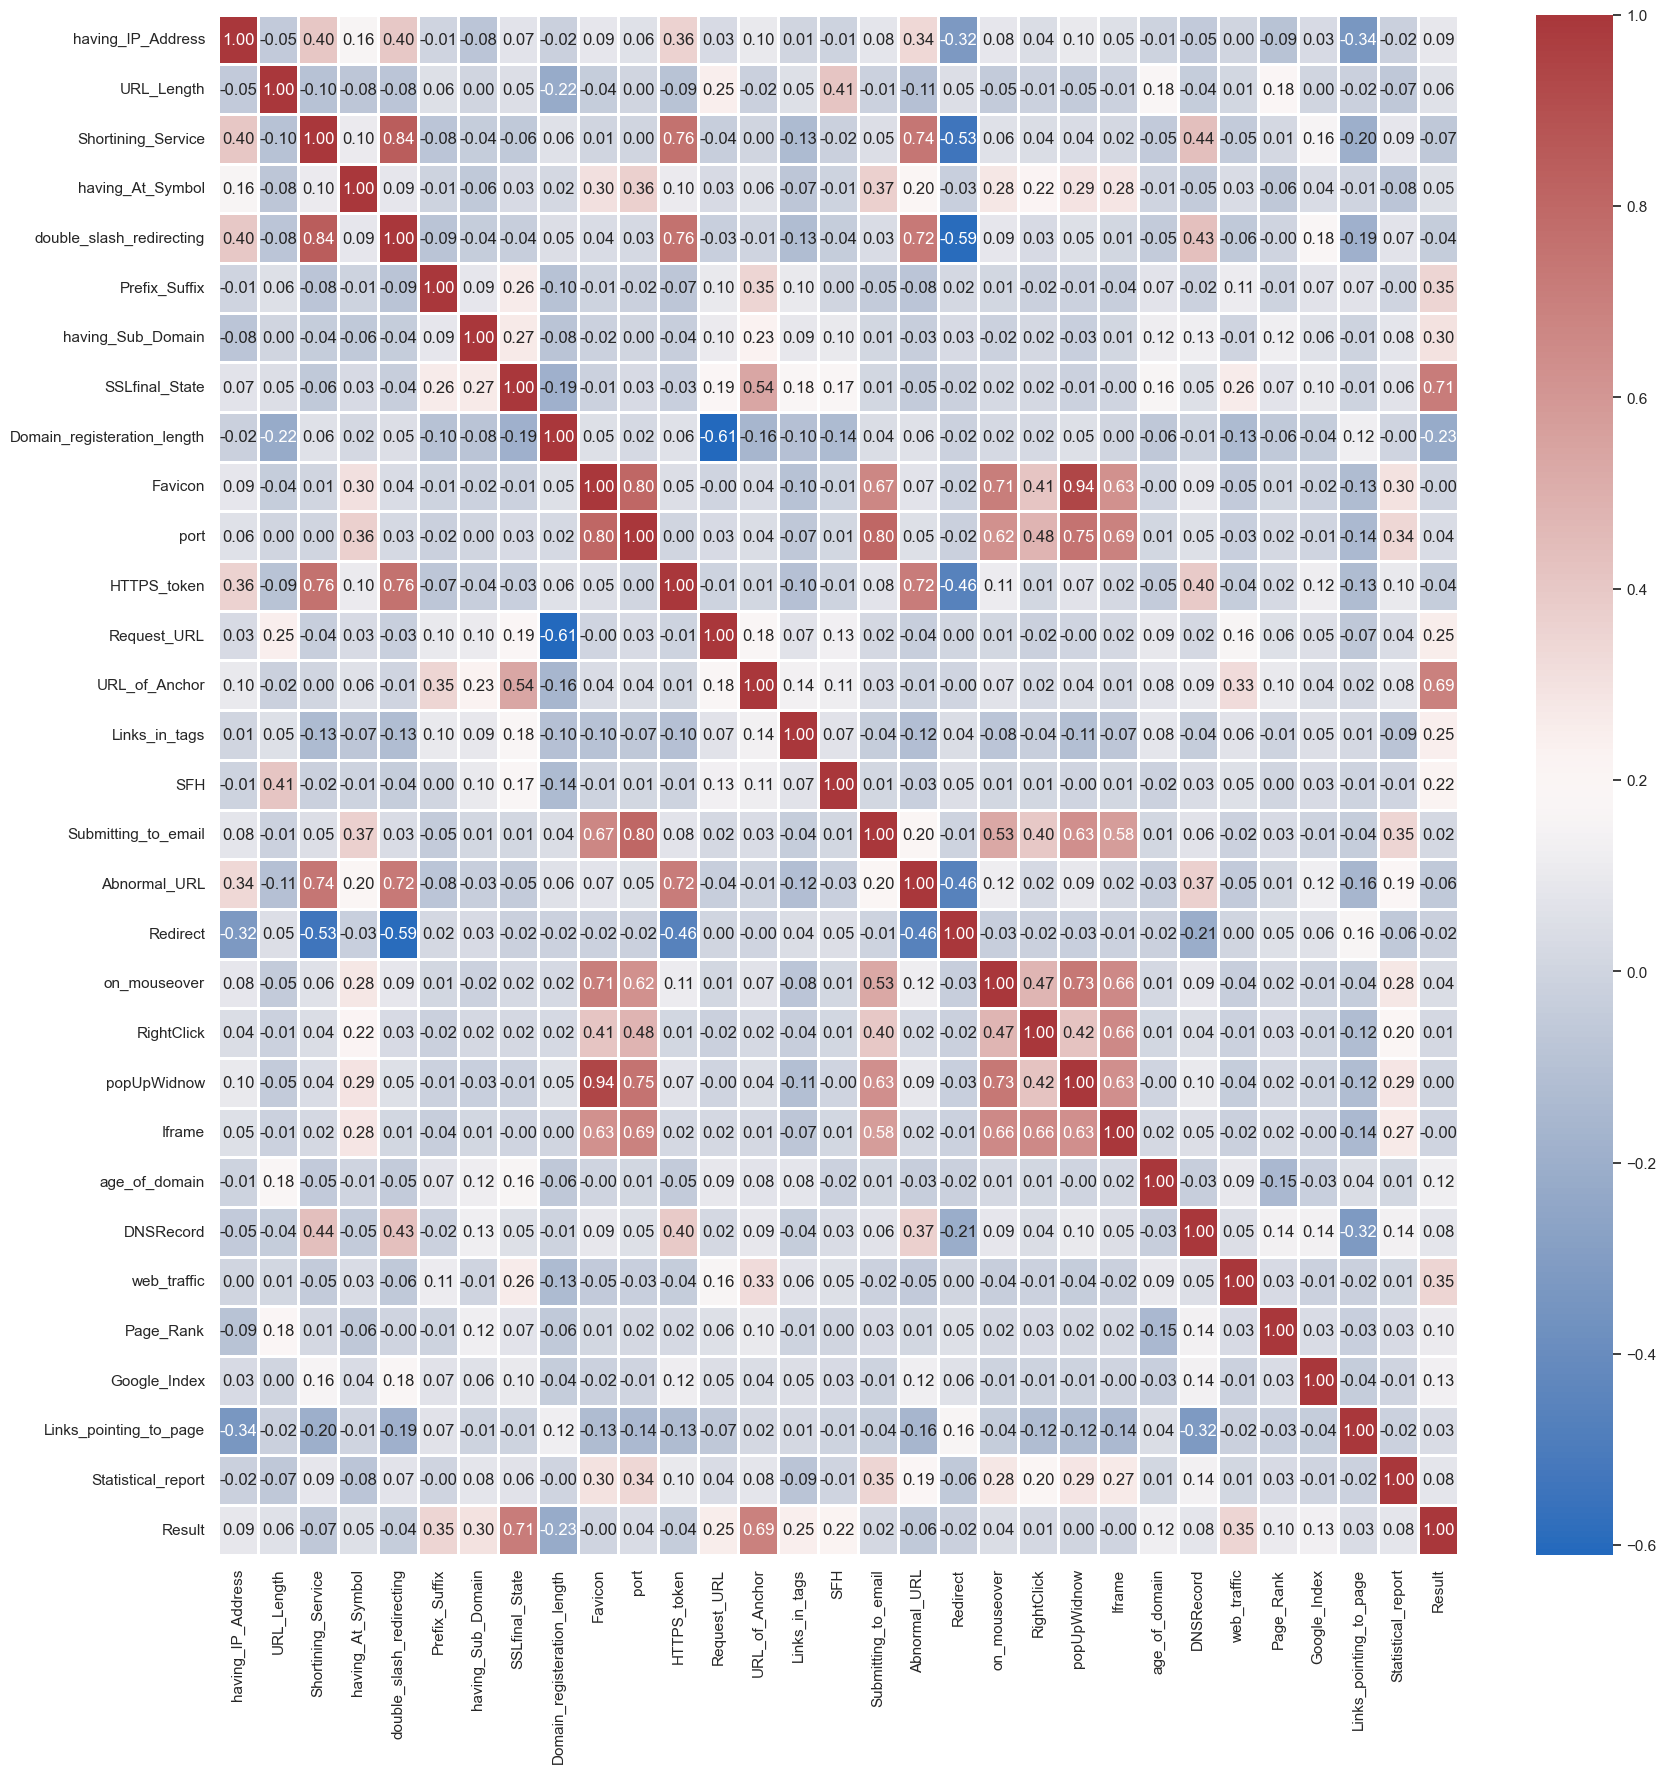

In [29]:
for c in df:
    df[c] = df[c].astype('int32')
correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt=".2f", linewidths=1)
plt.show()